### Compute complex frequency shift from impedance

The definitions and equations discussed here are obtained from Ref \cite{Chao:acceleratorhandbook} (Chapter 2.5.7) unless it is stated otherwise.

The coherent frequency shift of mode $m$ of a bunch of total current $I_{tot}$ and energy $E$ is (Eq 8 and 9 in \cite{Chao:acceleratorhandbook}):

\begin{equation}\label{eq:Sacherer_original}
    \Delta \omega_m = -\frac{iec}{m+1}\frac{I_{tot} Z_{\perp eff}^{(m)}}{4 \pi \nu_b E B} (1)
\end{equation}

where

- m is the azimuthial mode number $m \geq 0$. Note that this is actually a transverse mode number but it depends on the longitudinal motion/position of the particles. It should include the rigid bunch oscillation m=0, which usually has the largest frequency shift and is most likely to become unstable. 
- $E=m_p \gamma c^2$, with $m_p$ the proton mass in [kg], $\gamma=1/\sqrt{1-\beta^2}$ the relativistic factor and $c$ the speed of light in m/s. $\beta=u/c$ is the velocity relative to the speed of light.
 - $I_{tot} = n_b I_B = n_b N_B e f_{rev}$, where $I_B=N_B e f_{rev}$ is the bunch current, $N_B$ is the number of particles per bunch and $f_{rev}$ is the revolution frequency in [Hz]
 - $B=(4 f_{rev}\sigma_z)/c$ is the bunching factor, with $\sigma_z$ the rms bunch length in [m]
 - $\nu_b$ is the betatron tune
 - $Z_{\perp eff}^{(m)}$ is the effective impedance. It is described in more details below according to \cite{Chao:collective} (p.345-346).

Therefore, Eq.(1) can be re-written as follows:

\begin{equation}\label{eq:Sacherer_final}
    \Delta \omega_m = -\frac{i e c}{(m+1)}\frac{n_bN_B e f_{rev}Z_{\perp eff}^{(m)}}{4\pi \nu_b m_p \gamma c^2 \frac{4 f_{rev} \sigma_z}{c} } = -\frac{i e^2}{(m+1)}\frac{N_B Z_{\perp eff}^{(m)}}{16\pi \nu_b m_p \gamma \sigma_z} (2)
\end{equation}

The coherent tune shift, expressed in tune units $\Delta Q_m$, is written as follows:
\begin{equation}\label{eq:coherentTuneShift}
    \Delta Q_m = \frac{\Delta \omega_m}{2\pi f_{rev}}
\end{equation}

where $\Delta \omega_m$ is given by Eq.(2)

The effective impedance, $Z_{\perp eff}^{(m)}$, describes the effect of impedance on beam dynamics \cite{Chao:collective} (p.321). It depends on the beam properties, while the raw impedance does not. It is described by:

\begin{equation}
    Z_{\perp eff}^{(m)} = \frac{\sum_{p=-\infty}^{+ \infty}Z_{\perp }^{(m)}(\omega_{mp}) h_m(\omega_{mp}-\omega_\xi)}{\sum_{p=-\infty}^{+ \infty}h_m(\omega_{mp}-\omega_\xi)} (3)
\end{equation}

where

-  $\omega_{mp} = \omega_0 (n_b p+n-m_t \nu_b +m \nu_s) (4)$ is the oscillations spectrum of the the transverse bunch oscillations, with:
    -  $\omega_0$ is the angular revolution frequency
    -  $n_b$ the number of bunches
    -  $0 \leq n \leq n_b$, the coupled bunch mode number which gives the phase shift between oscillations off adjacent bunches.
    -  $m_t$ is the transverse mode number, which usually it is taken to be 1 (dipole oscillations).
    -  m is the azimuthial mode number.
- $\omega_\xi=(\xi \omega_0)/(\eta \nu_b)$ the chromatic frequency, with $\eta$ the phase slip factor. Note that:
    - $\xi = d\nu_b/d\delta$ is the chromaticity with $\delta=\Delta P/P_0$ the relative momentum error, and $Q^\prime=\xi/\nu_b$. Thus $\omega_\xi=Q^\prime \omega_0 / \eta$. \textbf{Attention:} In the simulations $Q^\prime$ is referred as chromaticity.
    
- $h_m$ is the power spectral density of a gaussian bunch oscillating in Hermite-Gaussian modes $m$. $h_m$ is described by \cite{Chao:acceleratorhandbook} (Chapter 2.5.7 Eq.4):
    \begin{equation}\label{eq:psd_gaussianBunch_oscillateModesm}
        h_m(\omega_{mp}) = (\omega_{mp} \sigma_z)^{2m} e^{-(\omega_{mp}\sigma_z)^2} (5)
    \end{equation}
     - Note that the beam spectral shifted due to chromaticity,  through $\omega_\xi$.


The real part of Eq.(2) $\mathrm{R}({\Delta \omega_m)}$, gives the mode frequency shift and the
imaginary part, $\mathrm{Im}({\Delta \omega_m)}$, gives the instability growth rate. 



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy import constants as cst
import matplotlib

In [2]:
# PLotting parameters
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### psd of gaussian bunch oscillating in modes, m
- Eq.5

In [3]:
def hmm_gauss(freq,tau,m=0): 
    return (2.0*np.pi*freq*tau/4)**(2*m) * np.exp(-(2.0*np.pi*freq*tau/4.)**2)

In [4]:
def hmm_gauss_omega(omega, tau, m=0):
    return (omega*tau/4)**(2*m) * np.exp(-(omega*tau/4.)**2)

### Parameters

In [5]:
N = 3.5E10
Q_y, nu_b = 26.18, 0.18
#nu_b=0.18 # fractional part of the tune
Qs = 0.0051

circum = 2*np.pi*1.1E3
frev = cst.c/circum

# compute the angular revolution frequency along with the synchrotron and betatron tune
omega_0 = 2*np.pi*frev
omega_b = 


gamma_t = 22.8
energy = 270.0
gamma = np.sqrt(1+(energy/0.938)**2)
eta = 1/gamma_t**2 - 1/gamma**2
tau = 1.85E-9 # 4 sigmat
sigmaz = tau*cst.c/4
chroma= 0.0 # Q'
m=0 # azimuthial mode number
m_t = 1
nb=1
n = 0 # coupled bunch mode ..
nu_n = 0.18

In [6]:
#omega_xi = chroma*frev/eta  # chromatic frequency shift, omega xi
omega_0 = 2*np.pi*frev
omega_xi = chroma*omega_0/eta  # chromatic frequency shift, omega xi
print(omega_0)

272538.5981818182


In [7]:
#nSideband = int(np.floor((1E10/frev))) # not well understood, why 1e10??
nSideband = int(np.floor((1E10*2*np.pi/(omega_0)))) # not well understood, why 1e10?? # 1e10 sidebands


sidebands_p = np.arange(-nSideband, nSideband+0.5)
print(sidebands_p) # it should be integers

[-230542. -230541. -230540. ...  230540.  230541.  230542.]


### Oscillation psectrum of the trasnverse bunch oscillations, E1q.4

In [8]:
omega_mp = omega_0*(nb*sidebands_p+n-m_t*nu_b+m*Qs) # xavier in his script used +nu_b*m_t

### PSD of gaussian bunch oscillation at mode m, Eq.5

(200000, 300000)

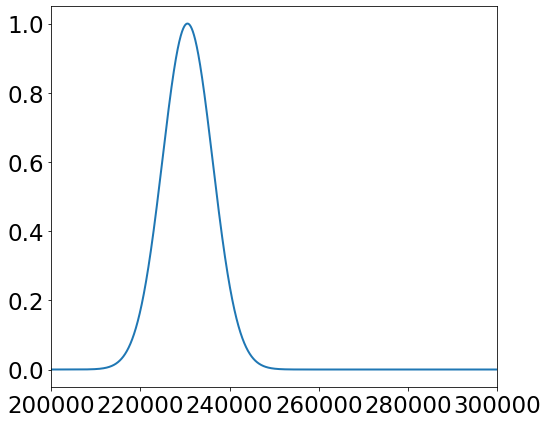

In [9]:
hs = hmm_gauss_omega(omega_mp-omega_xi, tau, m=m) # mode spectrum
plt.plot(hs)
plt.xlim(200000, 300000)

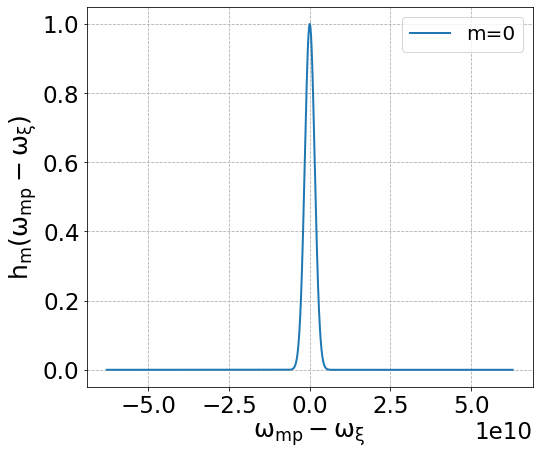

In [10]:
plt.plot(omega_mp-omega_xi, hs, label=f'm={m}')
#plt.xlim(-2e9,2e9)

plt.xlabel(r'$\mathrm{\omega_{mp}-\omega_\xi}$')
plt.ylabel(r'$\mathrm{h_m({\omega_{mp}-\omega_\xi}})}$')
plt.grid(linestyle='dashed')
plt.legend(loc=1)
#plt.savefig('./figures/hmModesScan.png')

### Load impedance data
A.Chao: The quantity (Z,//W)~~ is
essentially the weighted average of the impedance over the bunch mode
spectral power hmm. Whether a particular mode is driven significantly by
the impedance is determined by the degree to which the **impedance overlaps
the mode spectrum.**

In [11]:
#### Impedance model from https://gitlab.cern.ch/IRIS/SPS_IW_model/-/tree/master/SPS_IW_model_python ###########################################
path2impedanceModel='/home/natalia/PhD_projects/headtail_instabilities_and_impedance/from_Xavier'
impedanceData = np.genfromtxt(f'{path2impedanceModel}/SPS_Complete_imp_model_2018_Q26.txt', skip_header=1, dtype=complex) # type: array

freqZ = np.real(impedanceData[:, 0])*1E9 # Xavirer's script 1e6


ImagZ = np.imag(impedanceData[:, 2]) # dipole Y
ReZ = np.real(impedanceData[:, 2]) # dipole Y

In [12]:
# confert frequency from Hz to angular frequency
omegaZ = 2*np.pi*freqZ

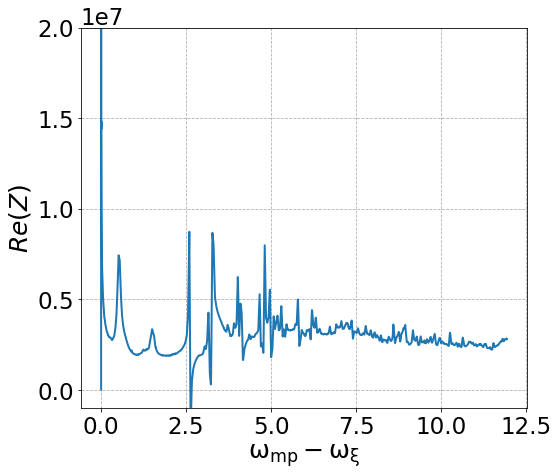

In [13]:
plt.plot(omegaZ/1e9, ReZ, label='dipole Y')
plt.ylim(-1.0e6, 2e7)
plt.xlabel(r'$\mathrm{\omega_{mp}-\omega_\xi}$')
plt.ylabel(r'$Re(Z)$')
plt.grid(linestyle='dashed')

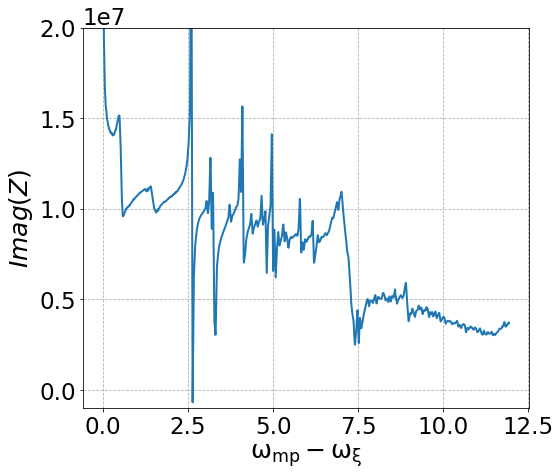

In [14]:
plt.plot(omegaZ/1e9, ImagZ, label='dipole Y')
plt.ylim(-1.0e6, 2e7)
plt.xlabel(r'$\mathrm{\omega_{mp}-\omega_\xi}$')
plt.ylabel(r'$Imag(Z)$')
plt.grid(linestyle='dashed')

### Compute effective impedance. eq(3)

In [15]:
zeffs_Re = np.interp(np.abs(omega_mp),omegaZ,ReZ)*np.sign(omega_mp)*hs # Interpolate over all frequencies (both positive and negative) np.sign(freqs) as the ReZ is always an odd function of the frequency
zeffs_Re /= np.sum(hs)
zeff_Re = np.sum(zeffs_Re)



zeffs_Im = np.interp(np.abs(omega_mp), omegaZ, ImagZ)*hs # np.sign(freqs) as the ReZ is always an odd function of the frequency
zeffs_Im /= np.sum(hs)
zeff_Im = np.sum(zeffs_Im)

print(zeff_Re, zeff_Im)

zeff=complex(zeff_Re, zeff_Im)
print(zeff)

-24814.931583538528 11809114.164987301
(-24814.931583538528+11809114.164987301j)


In [103]:
A = complex(0, - (cst.e**2*N/(16.0*np.pi*cst.m_p*gamma*nu_b*frev*sigmaz*2*np.pi)))
print(A)
DQ = A*zeff
print(DQ)

#Delta_omega_m = zeff*cst.e**2*N/(16.0*np.pi*cst.m_p*gamma*nu_b*frev*sigmaz*2*np.pi)

-3.752559132059565e-11j
(0.00044314399201357064+9.311949812524083e-07j)


## Coherent tune shift

In [47]:
np.real(Delta_omega_m)

0.00044313794787906937

## Growth/Damping rate  (for +/- respectively)

In [48]:
np.imag(Delta_omega_m)

-2.2669747641527237e-07

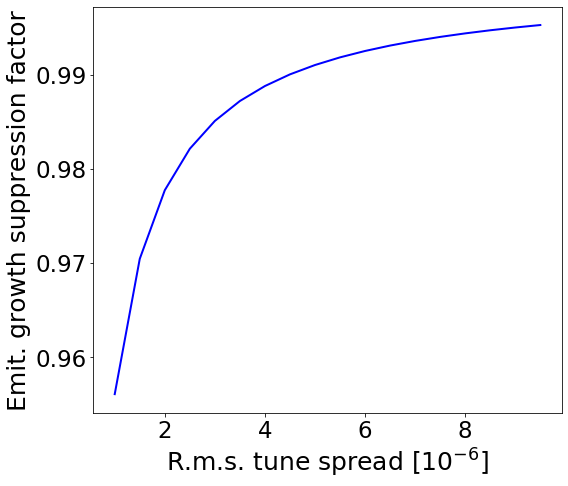

In [49]:
dampingRate= -np.imag(Delta_omega_m)

dGain = 2*dampingRate
dmu = np.arange(1E-6,1E-5,5E-7)
supps = np.zeros_like(dmu)
for i in range(len(dmu)):
    f = lambda x : (4*np.pi**2*(1-dGain/2)**2*x**2)*np.exp(-x**2/(2.0*dmu[i]**2))/((4*np.pi**2*(1-dGain/2)*x**2+(dGain/2)**2)*np.sqrt(2*np.pi)*dmu[i])
    integral = quad(f,-10*dmu[i],10*dmu[i])
    supps[i] = integral[0]
##################################################################################################################################################

fig = plt.figure(1)
plt.plot(dmu*1E6,supps,'-b')
plt.xlabel(r'R.m.s. tune spread [$10^{-6}$]')
plt.ylabel(r'Emit. growth suppression factor')
plt.tight_layout()
plt.show()
